In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read the data

In [2]:
df = pd.read_csv('/home/dawidkubicki/AI-Projects/PyTorch-Crash-Projects/Data/NYCTaxiFares.csv')

In [3]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [4]:
df['fare_amount'].describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

Feature engineering

In [5]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [6]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [7]:
df['dist_km'] = haversine_distance(df, 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

In [8]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
 8   dist_km            120000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 8.2+ MB


In [10]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
 8   dist_km            120000 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 8.2 MB


In [12]:
my_time = df['pickup_datetime'][0]

In [13]:
df['EDTdate'] = df['pickup_datetime'] - pd.Timedelta(hours=4)

In [14]:
df['Hour'] = df['EDTdate'].dt.hour

In [15]:
df['AMorPM'] = np.where(df['Hour'] < 12, "am", "pm")

In [16]:
df['Weekday'] = df['EDTdate'].dt.dayofweek

In [17]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM,Weekday
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am,0
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am,5
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am,5
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm,6
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm,4


In [18]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km', 'EDTdate', 'Hour', 'AMorPM', 'Weekday'],
      dtype='object')

In [19]:
cat_cols = ['Hour', 'AMorPM', 'Weekday']
cont_cols = ['pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km']

In [20]:
y_col = ['fare_amount']

In [23]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                            category
AMorPM                          category
Weekday                         category
dtype: object

In [22]:
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [24]:
df['Hour'].head()

0     4
1    11
2     7
3    17
4    22
Name: Hour, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [25]:
df['AMorPM'].head()

0    am
1    am
2    am
3    pm
4    pm
Name: AMorPM, dtype: category
Categories (2, object): ['am', 'pm']

In [26]:
df['Weekday'].head()

0    0
1    5
2    5
3    6
4    4
Name: Weekday, dtype: category
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]

In [31]:
df['Weekday'].cat.codes.values

array([0, 5, 5, ..., 6, 1, 5], dtype=int8)

In [32]:
hr = df['Hour'].cat.codes.values
ampm = df['AMorPM'].cat.codes.values
wkdy = df['Weekday'].cat.codes.values

In [33]:
hr

array([ 4, 11,  7, ..., 14,  4, 12], dtype=int8)

In [34]:
cats = np.stack([hr,ampm,wkdy], axis=1)

In [35]:
cats

array([[ 4,  0,  0],
       [11,  0,  5],
       [ 7,  0,  5],
       ...,
       [14,  1,  6],
       [ 4,  0,  1],
       [12,  1,  5]], dtype=int8)

In [36]:
cats = torch.tensor(cats, dtype=torch.int64)

In [37]:
conts = np.stack([df[col].values for col in cont_cols], axis=1)

In [38]:
conts

array([[-73.992365  ,  40.730521  , -73.975499  ,  40.744746  ,
          1.        ,   2.12631159],
       [-73.990078  ,  40.740558  , -73.974232  ,  40.744114  ,
          1.        ,   1.39230687],
       [-73.994149  ,  40.751118  , -73.960064  ,  40.766235  ,
          2.        ,   3.32676344],
       ...,
       [-73.988574  ,  40.749772  , -74.011541  ,  40.707799  ,
          3.        ,   5.05252282],
       [-74.004449  ,  40.724529  , -73.992697  ,  40.730765  ,
          1.        ,   1.20892296],
       [-73.955415  ,  40.77192   , -73.967623  ,  40.763015  ,
          3.        ,   1.42739869]])

In [39]:
conts = torch.tensor(conts, dtype=torch.float)

In [40]:
conts

tensor([[-73.9924,  40.7305, -73.9755,  40.7447,   1.0000,   2.1263],
        [-73.9901,  40.7406, -73.9742,  40.7441,   1.0000,   1.3923],
        [-73.9941,  40.7511, -73.9601,  40.7662,   2.0000,   3.3268],
        ...,
        [-73.9886,  40.7498, -74.0115,  40.7078,   3.0000,   5.0525],
        [-74.0044,  40.7245, -73.9927,  40.7308,   1.0000,   1.2089],
        [-73.9554,  40.7719, -73.9676,  40.7630,   3.0000,   1.4274]])

In [44]:
y = torch.tensor(df[y_col].values, dtype=torch.float).reshape(-1,1)

In [45]:
cats.shape

torch.Size([120000, 3])

In [46]:
conts.shape

torch.Size([120000, 6])

In [47]:
y.shape

torch.Size([120000, 1])

In [48]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]

number of features in each category

In [49]:
cat_szs

[24, 2, 7]

In [50]:
emb_size = [(size,min(50, (size+1)//2)) for size in cat_szs]

(number of elements (as vocab_size) , and emd dim calculated with def above)

In [51]:
emb_size

[(24, 12), (2, 1), (7, 4)]

In [56]:
catz = cats[:2]

In [57]:
catz

tensor([[ 4,  0,  0],
        [11,  0,  5]])

In [55]:
#embedding
selfembeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_size])
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [59]:
embeddingz = []

for i,e in enumerate(selfembeds):
    embeddingz.append(e(catz[:,i]))

In [60]:
embeddingz

[tensor([[-0.8845, -1.6112, -1.0094,  0.7949,  1.9686,  1.2024,  1.3975,  1.1415,
           0.3860, -0.4418, -1.0945, -0.3278],
         [-0.2963, -2.4074,  0.9810, -0.1579, -0.4415,  1.2358,  0.4992,  1.2863,
           0.2387,  1.0353, -0.7794, -1.7474]], grad_fn=<EmbeddingBackward>),
 tensor([[0.4293],
         [0.4293]], grad_fn=<EmbeddingBackward>),
 tensor([[-0.7417,  0.1823,  1.0924,  0.2327],
         [-0.6904,  0.6933, -1.7243,  1.5173]], grad_fn=<EmbeddingBackward>)]

In [61]:
z = torch.cat(embeddingz,1)

In [62]:
z

tensor([[-0.8845, -1.6112, -1.0094,  0.7949,  1.9686,  1.2024,  1.3975,  1.1415,
          0.3860, -0.4418, -1.0945, -0.3278,  0.4293, -0.7417,  0.1823,  1.0924,
          0.2327],
        [-0.2963, -2.4074,  0.9810, -0.1579, -0.4415,  1.2358,  0.4992,  1.2863,
          0.2387,  1.0353, -0.7794, -1.7474,  0.4293, -0.6904,  0.6933, -1.7243,
          1.5173]], grad_fn=<CatBackward>)

In [63]:
selfembdrop = nn.Dropout(0.4)

In [64]:
z = selfembdrop(z)

In [65]:
z

tensor([[-1.4742, -2.6853, -1.6823,  0.0000,  0.0000,  2.0040,  2.3292,  1.9026,
          0.0000, -0.7363, -1.8242, -0.0000,  0.7155, -0.0000,  0.3039,  0.0000,
          0.0000],
        [-0.4939, -4.0123,  1.6350, -0.0000, -0.7359,  2.0597,  0.0000,  2.1438,
          0.0000,  0.0000, -1.2991, -0.0000,  0.0000, -1.1507,  0.0000, -2.8738,
          2.5288]], grad_fn=<MulBackward0>)

In [69]:
class TabularModel(nn.Module):
    def __init__(self, emb_size, n_cont, out_size, layers,p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_size])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_embs = sum([nf for ni, nf in emb_size])
        n_in = n_embs + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in, i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
            
        layerlist.append(nn.Linear(layers[-1], out_size))
        
        self.layers = nn.Sequential(*layerlist)
        
    def forward(self, x_cat,x_cont):
        embeddings = []
        
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
            
        x = torch.cat(embeddings,1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x,x_cont],1)
        x = self.layers(x)
        
        return x

In [70]:
torch.manual_seed(33)
model = TabularModel(emb_size,conts.shape[1],1,[200,100],p=0.4)

In [71]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [72]:
criterion = nn.MSELoss() #np.sqrt(MSE) --> RMSE
#CrossEntropyLoss if classification problem 
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [73]:
batch_size = 60000
test_size = int(batch_size*0.2)


In [74]:
#data shuffle already
cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]

In [75]:
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [76]:
len(cat_train)

48000

In [78]:
len(con_train)

48000

In [81]:
import time

start_time = time.time()

epochs = 300 

losses = [] 

for i in range(epochs):
    i += 1
    
    y_pred = model(cat_train,con_train)
    loss = torch.sqrt(criterion(y_pred,y_train))
    losses.append(loss)
    
    if i%10 == 1:
        print(f"epoch: {i} loss {loss}")
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
duration = time.time() - start_time
print(f"Training took {duration/60} minutes")

epoch: 1 loss 12.592203140258789
epoch: 11 loss 11.693614959716797
epoch: 21 loss 11.119453430175781
epoch: 31 loss 10.735398292541504
epoch: 41 loss 10.456976890563965
epoch: 51 loss 10.233396530151367
epoch: 61 loss 10.030220985412598
epoch: 71 loss 9.839351654052734
epoch: 81 loss 9.639607429504395
epoch: 91 loss 9.41850757598877
epoch: 101 loss 9.181029319763184
epoch: 111 loss 8.892024040222168
epoch: 121 loss 8.569040298461914
epoch: 131 loss 8.218955993652344
epoch: 141 loss 7.817890644073486
epoch: 151 loss 7.379687786102295
epoch: 161 loss 6.9254679679870605
epoch: 171 loss 6.448631763458252
epoch: 181 loss 5.9784159660339355
epoch: 191 loss 5.486588001251221
epoch: 201 loss 5.021686553955078
epoch: 211 loss 4.645244121551514
epoch: 221 loss 4.303776741027832
epoch: 231 loss 4.076037883758545
epoch: 241 loss 3.960707187652588
epoch: 251 loss 3.8692128658294678
epoch: 261 loss 3.8165194988250732
epoch: 271 loss 3.7927839756011963
epoch: 281 loss 3.738405466079712
epoch: 291 los

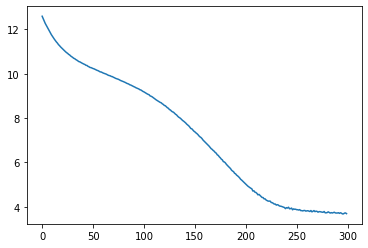

In [82]:
plt.plot(range(epochs), losses)

In [84]:
with torch.no_grad():
    
    y_val = model(cat_test, con_test)
    
    loss = torch.sqrt(criterion(y_val,y_test))

In [85]:
loss

tensor(3.6140)

In [90]:
for i in range(10):
    diff = np.abs(y_val[i].item()-y_test[i].item())
    print(f"{i}.) PREDICTED: {y_val[i].item():8.4f}  TRUE {y_test[i].item():8.4f}   Difference is: {diff:8.4f}")

0.) PREDICTED:   4.7579  TRUE   2.9000   Difference is:   1.8579
1.) PREDICTED:  20.2632  TRUE   5.7000   Difference is:  14.5632
2.) PREDICTED:   8.0453  TRUE   7.7000   Difference is:   0.3453
3.) PREDICTED:  13.3056  TRUE  12.5000   Difference is:   0.8056
4.) PREDICTED:   5.4862  TRUE   4.1000   Difference is:   1.3862
5.) PREDICTED:   5.1544  TRUE   5.3000   Difference is:   0.1456
6.) PREDICTED:   8.8637  TRUE   3.7000   Difference is:   5.1637
7.) PREDICTED:  16.0542  TRUE  14.5000   Difference is:   1.5542
8.) PREDICTED:   3.8367  TRUE   5.7000   Difference is:   1.8633
9.) PREDICTED:  13.5560  TRUE  10.1000   Difference is:   3.4560


In [91]:
# torch.save(model.state_dict(), "TaxiModel.pt")